# PART1: 以 jieba 探索文本主題 (歌詞文本)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
#文字雲
from wordcloud import WordCloud

## 設定為繁中字典

In [2]:
jieba.set_dictionary("jieba_dict/dict.txt.big")

## 1. 透過 tf-idf 原理，取每首歌的前10大重要的tag (共33首歌)

In [3]:
with open("lyrics/test1.txt", "r") as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10)
        print(",".join(words))
f1.close()

Building prefix dict from /Users/youngmihuang/Desktop/PyLadies/jieba_dict/dict.txt.big ...
Loading model from cache /var/folders/c6/vq7n4xz94bqdm56d8hb739kr0000gn/T/jieba.u61de2cbc86a45c8f420ba10366a9081d.cache
Loading model cost 2.162 seconds.
Prefix dict has been built succesfully.


不會,時間,歲月,回憶,一天,也許,終點,舉起,懷念,悠悠的

我們,哪裡,從不,相識,那個,場景,出現,不曾,相遇,每秒

我們,好好,一隻,不過,沒有,變老,時間,喧囂,最後,知道

後來,我們,人生,無論是,淚水,一個,期待,中能,然後,回憶

滾燙,入陣曲,無悔,夜未央,天未亮,倖存,沙場,臉龐,淚未,心未涼

最好,day,一天,閉上眼,瞬間,銀河,好了沒,best,那天,地球

OAOA,一個,短暫,人生,飢渴,腳尖,一種,無止盡,和諧,復活

la,will,孤單,high,everything,alright,Tomorrow,fine,High,陪伴

oh,party,hey,let,go,night,lonely,我們,派對,動物

什麼,能夠,拯救,殘酷,攻擊,那麼,束手無策,愛情,結局,地球

決定,快樂,保護色,不愛了,靈魂,永遠,鎖上,軀殼,真正,不恨

一個,兄弟,我們,這樣,怎樣,一次,身旁,人生,一場,變成

過嗎,人生,部門,沒有,富貴榮華,目標,飛黃騰達,請假,無限,有限

盡頭,怎麼樣,終點,可有光,我們,成名,那夜,起點,可會亮,綻放

變成,交響,每個,孤單,一個,人唱,沒人,還有,崩壞,我心

記得,卡片,西天,夥伴,掏耳朵,累不累,兵荒馬亂,改變,滿天,人類

怎麼,擁有,快樂,足夠,一陣風,吹來,風箏,祈禱,感動,終於

我們,人們,無數,未來,如海,怎樣,命運,流轉,相異,羅盤

yeah,出現,有沒有,呼喚,越來越,一種,電影,情節,黎明,無法

頑固,一次,深處,活在,淚滴,拼回,一天,吞下,相信,自己

do,ever,shine,die,現在,try,出來,jalalan,jalalala,沒有

何時,看見,人們,改變,夢寐以求,容顏,擁有,問你,春天,就算

煩惱,噗通,甩掉,跳越,丟掉,地球,一顆,一瞬間,忘掉,再也

love,ing,戀愛,改變,黃昏,happy,噴射機,黎明,心情,心跳

我們,任意,那個,走過,唱片,無數,無盡,歲月,搭著,環遊

有沒有,回憶,自傳,最終,最愛,愛情,遺忘,原來,飛翔,身旁

什麼,決定,快樂,傷心,就讓,之後,潮落,潮起,整個,拋棄

動次,快樂,oh,不管,慢歌,反正,感覺,活著,趴著,音樂

一層,聽到,空氣,洋蔥,永遠,願意,剝開,沉默,偷偷,如果


## 2. 把所有歌的 10 大 tags 再取前 N 個tags，N 可自行決定，此處先取 N = 15 做示範 print 出
- 文章當中是取 N = 200

In [25]:
with open("lyrics/lyrics_tags.txt", "rb") as f2:
    for line in f2:
        tags = jieba.analyse.extract_tags(line,15) #取Ｎ個tags
        print(",".join(tags))
f2.close()

我們,回憶,沒有,一個,快樂,孤單,什麼,改變,人生,時間,歲月,終點,那個,出現,一隻


## 3. 文字雲呈現
- WordCloud Module 功能
- stopwords 停用字調整
- 存檔

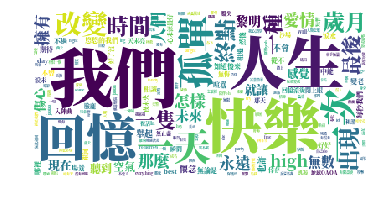

In [26]:
# 讀取欲透過文字雲計算詞頻的檔案
text = open("lyrics/lyrics_tags.txt").read()
# 建立停用字
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞

# 產生文字雲
wc.generate(text)

# 視覺化
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

# 存檔
wc.to_file("lyrics/wordcloud1.jpg")

## 討論：文字雲針對不同程度資料處理 part
- 原歌詞檔案（未斷詞）
- 原歌詞檔案（有斷詞）
- 每首歌取前 10 大關鍵字（共 330 個）
- 最終關鍵字（從上述 330 個挑 200 個）

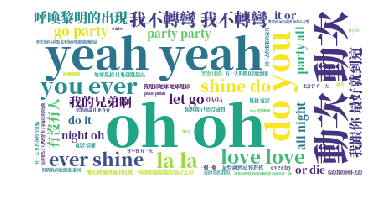

In [27]:
#原歌詞檔案_未斷詞
text = open("lyrics/test1.txt").read()
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

# 存檔
wc.to_file("lyrics/wordcloud_test1.jpg")

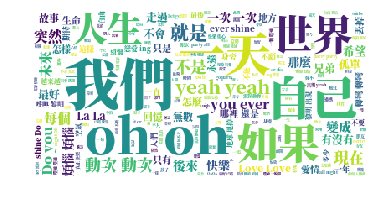

In [28]:
#已斷詞
text = open("lyrics/lyrics_cut_test1.dataset").read()
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

# save
wc.to_file("lyrics/wordcloud_test2.jpg")

In [56]:
# 把所有歌的10大tags取tags，也就是從330個tags (33*10) 精煉成取100個tags
wtags_all = codecs.open("lyrics/lyrics_tags_combine.txt", "w", "utf-8")
with open("lyrics/lyrics_tags.txt", "rb") as f3:
    for line in f3:
        tags = jieba.analyse.extract_tags(line,200)
        wtags_all.write(" ".join(tags))
f3.close()

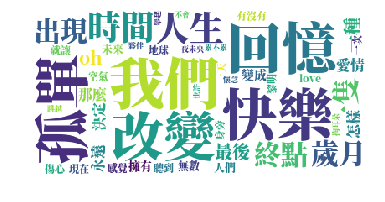

In [63]:
#最終關鍵字
text = open("lyrics/lyrics_tags_combine.txt").read()
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

# save
wc.to_file("lyrics/wordcloud_test4.jpg")